## Introduction

### The Challenge

In the fast-paced world of football (or soccer, depending on where you're from), every move matters. Players dart around the field, making passes, taking shots, and engaging in intricate plays, each motion contributing to the overarching narrative of the game. Capturing these movements accurately provides invaluable insights into the game's dynamics, player strategies, and team tactics.

Our dataset is unique; it captures the very essence of these movements. Derived from the 'Meteor' tracker, we have accelerometer data detailing the gait of football players. This tracker embeds an accelerometer that provides the 3-dimensional acceleration of the leg throughout time, captured at a 50Hz frequency. The challenge here isn't just to interpret this data but to utilize it in a manner that breathes life into these numbers.

### Goal

Our ambitious goal is not just to analyze or classify these movements. Instead, we aim to recreate the football game in its entirety using Generative AI. By leveraging this accelerometer data, our objective is to simulate the fluid movements, the plays, the actions, and the intricacies of a real football game. Such a recreation would not only serve as a testament to the capabilities of modern AI but also pave the way for a myriad of applications, from virtual training modules for teams to enhanced fan experiences.


# 1

## Data Loading and Initial Exploration

Let's start by loading our data and doing an initial check on its structure.


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data
with open('match_1.json', 'r') as file:
    data = json.load(file)

# Check the number of entries
num_entries = len(data)
print(f"Number of entries: {num_entries}")

# Check the keys in the first entry
first_entry_keys = data[0].keys()
print(f"Keys in the first entry: {first_entry_keys}")

# Checking for missing values
missing_values = df.isnull().sum()

print(f"Missing values per column:\n{missing_values}\n")


Number of entries: 574
Keys in the first entry: dict_keys(['label', 'norm'])
Missing values per column:
label    0
norm     0
dtype: int64



## Visualizing the Distribution of Actions

This section will visualize the distribution of player actions. By understanding the distribution, we get an idea of the most common and rare actions in the dataset.



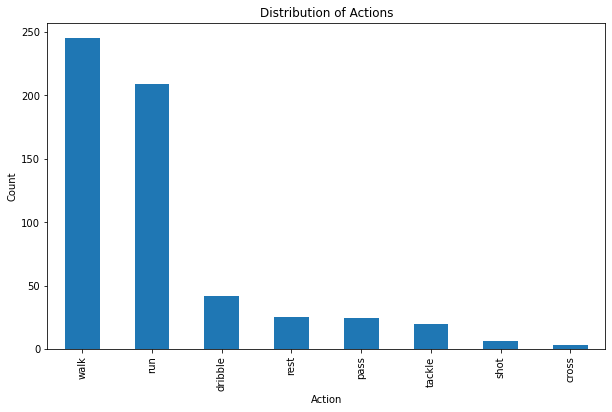

Action Counts:
walk       245
run        209
dribble     42
rest        25
pass        24
tackle      20
shot         6
cross        3
Name: label, dtype: int64


In [ ]:
# Create a DataFrame for easier analysis
df = pd.DataFrame(data)

# Count occurrences of each action label
action_counts = df['label'].value_counts()

# Plot a bar chart to visualize the distribution of actions
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.title('Distribution of Actions')
plt.xlabel('Action')
plt.ylabel('Count')
plt.show()

# Print action counts for clarity
print("Action Counts:")
print(action_counts)


## Action Acceleration Analysis

The next step is to understand how the acceleration values change with different actions. By calculating the mean and standard deviation for each action's acceleration values, we can gauge the variation in player movements.


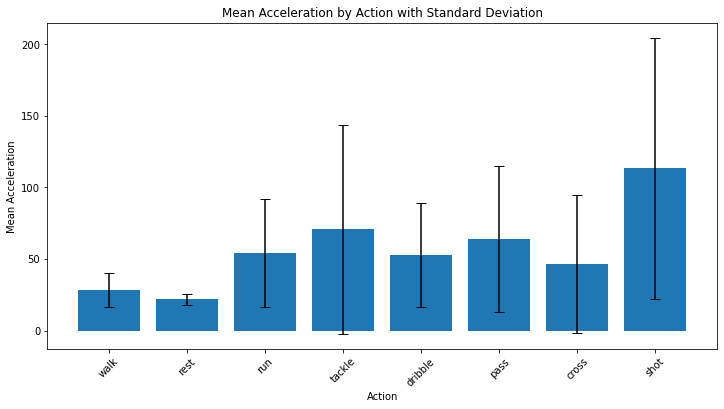

    Action  Mean Acceleration  Standard Deviation
0     walk          28.094867           11.907785
1     rest          21.833567            3.782520
2      run          54.404593           37.846293
3   tackle          70.668582           73.227853
4  dribble          52.882526           36.162866
5     pass          64.133278           51.041753
6    cross          46.708458           48.141749
7     shot         113.278717           91.347216


In [ ]:
# Create an empty list to store the results as dictionaries
result_list = []

# Iterate through unique action labels
for action_label in df['label'].unique():
    # Filter the data for the current action label
    filtered_data = df[df['label'] == action_label]

    # Initialize lists to store mean accelerations and standard deviations for each gait within the action
    mean_accelerations = []
    std_deviations = []

    # Iterate through each gait in the filtered data
    for acceleration_values in filtered_data['norm']:
        # Convert the list of acceleration values to a NumPy array
        acceleration_array = np.array(acceleration_values)

        # Calculate mean and standard deviation for the current gait
        mean_accelerations.append(np.mean(acceleration_array))
        std_deviations.append(np.std(acceleration_array))

    # Calculate the overall mean and standard deviation for the action
    overall_mean = np.mean(mean_accelerations)
    overall_std = np.mean(std_deviations)

    # Append the results to the result list
    result_list.append({'Action': action_label, 'Mean Acceleration': overall_mean, 'Standard Deviation': overall_std})

result_df = pd.DataFrame(result_list)

# Plot mean acceleration for each action with error bars
plt.figure(figsize=(12, 6))
plt.bar(result_df['Action'], result_df['Mean Acceleration'], yerr=result_df['Standard Deviation'], capsize=5)
plt.title('Mean Acceleration by Action with Standard Deviation')
plt.xlabel('Action')
plt.ylabel('Mean Acceleration')
plt.xticks(rotation=45)
plt.show()
print(result_df)


## Interpretations of Acceleration Analysis by Action

**1. Walk**
- **Mean Acceleration**: 28.09
- **Standard Deviation**: 11.91
    - Walking has the second lowest mean acceleration, which is expected as walking involves slower movements. The relatively low standard deviation implies that the walking pace among players is fairly consistent.

**2. Rest**
- **Mean Acceleration**: 21.83
- **Standard Deviation**: 3.78
    - As expected, resting has the lowest mean acceleration among all actions, indicating minimal movement. The low standard deviation suggests that periods of rest are consistently still across different instances.

**3. Run**
- **Mean Acceleration**: 54.40
- **Standard Deviation**: 37.85
    - Running shows a significant increase in mean acceleration compared to walking, indicative of the faster pace. The high standard deviation suggests that the running speed varies considerably—some players may sprint while others jog.

**4. Tackle**
- **Mean Acceleration**: 70.67
- **Standard Deviation**: 73.23
    - Tackling has a high mean acceleration, reflecting the sudden and forceful nature of this action. The very high standard deviation indicates a vast range in the intensity of tackles, from softer interventions to powerful blocks.

**5. Dribble**
- **Mean Acceleration**: 52.88
- **Standard Deviation**: 36.16
    - Dribbling, which involves controlling the ball while running, has a mean acceleration slightly below running. The considerable standard deviation suggests varied dribbling speeds and intensities, perhaps depending on the in-game situation.

**6. Pass**
- **Mean Acceleration**: 64.13
- **Standard Deviation**: 51.04
    - Passing has a higher mean acceleration than dribbling, which might be due to the swift movement needed to pass the ball. The high standard deviation implies variations in the force and speed of different passes.

**7. Cross**
- **Mean Acceleration**: 46.71
- **Standard Deviation**: 48.14
    - Crossing, or aerial passes, have a mean acceleration that is less than ground passes. This might be due to the preparatory movement for a cross. The high standard deviation indicates a variety of crossing techniques and intensities.

**8. Shot**
- **Mean Acceleration**: 113.28
- **Standard Deviation**: 91.35
    - Shots display the highest mean acceleration, underscoring the force and speed required to shoot at the goal. The large standard deviation indicates a range of shot types, from gentle taps to powerful strikes.

---

By analyzing the mean acceleration and its variability for each action, we gain insights into the nature and intensity of movements in football. This data provides a foundation to understand player behavior and could be pivotal in tactical analyses and training improvements.


# 2


## Approaches to Recreate the Football Game

### 1. Generative Adversarial Networks (GANs)
Generative Adversarial Networks or GANs can be a potent approach for this task. By training a GAN on the accelerometer data and the corresponding labels, we can generate new game scenarios that mimic real-life football matches. GANs consist of two main components: a generator and a discriminator. The generator creates new data samples, while the discriminator attempts to distinguish between real and generated samples. Over time, the generator gets better at producing realistic game data.

### 2. State Transition Matrix (STM)
STMs provide a way to model the probabilities of transitioning from one state (or action) to another. In the context of the football game, the STM can represent the likelihood of a player transitioning from one action (e.g., walk) to another (e.g., run). By examining the STM, we can gain insights into the natural flow of the game and the typical sequences of player actions. This information can then be used to simulate realistic segments of a football match.

### 3. Classical Machine Learning
Traditional machine learning models like Random Forests or Gradient Boosted Trees can be trained on the provided data to predict player actions based on their gait. While they might not be as sophisticated as deep learning models, they can provide interpretable results and work well when the dataset isn't vast.


### 5. Physics-Based Simulation
By integrating the accelerometer data with known physics principles, we can create a physics-based simulation of the game. This approach can capture the biomechanics of players' movements, offering a realistic recreation of the game.

### 7. Agent-Based Modeling
This involves creating a simulation where each player is modeled as an individual agent. By feeding the accelerometer data into this model, we can simulate individual and collective behaviors of players on the field.



# 3

## 3. Chosen Approach: State Transition Matrix (STM) and Generative Adversarial Networks (GANs)

### A. State Transition Matrix (STM)

#### Why STM?

- **Simplicity and Efficiency**: STM is computationally less intensive than deep learning models. With limited data, it's essential to choose a model that can provide meaningful insights without vast amounts of training data.
  
- **Interpretability**: STM offers clear visibility into transition probabilities, making it easy to interpret and understand player behavior patterns.

- **Data Limitations**: Given the constraint of having limited data, more complex models like deep neural networks or GANs might overfit. STM, with its inherent simplicity, is less prone to overfitting with smaller datasets.

#### Input Assumption for STM:

The STM anticipates sequences of states (in our case, player actions) to compute the probability of transitioning from one state to another. Our input will be sequences of actions players take.

### B. Generative Adversarial Networks (GANs) - A Secondary Approach

#### Why GANs?

- **Data Generation**: GANs can be trained to generate new, synthetic data instances that can resemble a given set of real data. This capability is invaluable for tasks aiming to recreate scenarios or instances, such as our football game recreation.

- **Advanced Representations**: GANs can capture intricate patterns and relationships in data, which can be beneficial for recreating nuanced movements and actions in football.

#### Challenges with GANs:

- **Data Requirement**: GANs typically need a substantial amount of data for effective training and can overfit on smaller datasets easily.

- **Training Complexity**: GANs involve the simultaneous training of two networks (Generator and Discriminator), which can be challenging and resource-intensive.

---

Understanding that while STM provides an immediate solution given our current constraints, GANs offer a more sophisticated approach when conditions (like data availability) are more favorable.


### Mathematical Approach of State Transition Matrix (STM)

In the context of recreating games based on data, the State Transition Matrix (STM) is employed to determine how players transition from one action to another. Mathematically, a STM, \( T \), is defined such that:

$$ T_{ij} = P(\text{{next action is }} j \mid \text{{current action is }} i) $$

Where:
- ( $T_{ij}$ ) is the element at the ($i^{th}$) row and ($j^{th}$) column of matrix ( T ).
- ( $P(\text{{next action is }} j \mid \text{{current action is }} i) $) is the probability that action (j) follows action ( i).

Given a series of actions, the transition matrix is built by computing the normalized frequency of transitioning from one action to another across the dataset. This matrix then serves as the foundation to simulate new game sequences.

### Pre-processing of Data

1. **Loading Data**: The raw game data, stored as JSON, is loaded into a pandas DataFrame.
2. **Computing Next Action**: For each action, the next action in the sequence is computed by shifting the 'label' column up by one position. This creates a new column 'next_action'.
3. **Handling Missing Data**: Since the last entry doesn't have a 'next_action', any NaN values (due to the shift) are dropped from the dataset.

### Application of STM to the Game Data

1. **Computing the Transition Matrix**: Using the pre-processed data, a transition matrix is computed. The matrix provides probabilities of transitioning from one action to another.
2. **Style Adjustments**: Depending on the chosen style (attacking, defensive, normal, or custom), the transition probabilities are adjusted to reflect the style's characteristics.
3. **Action Distributions Calculation**: For each action, two distributions are calculated:
    - **Norm Distributions**: The average and standard deviation of the 'norm' values across all instances of that action.
    - **Length Distributions**: The average and standard deviation of the length (number of data points) of the 'norm' values across all instances of that action.
4. **Simulating a Game**:
    - Start with an initial action (e.g., 'walk').
    - For the current action, choose the next action based on the transition matrix's probabilities.
    - Use the norm and length distributions to generate 'norm' values for the current action.
    - Continue choosing next actions and generating 'norm' values until the desired duration is met.

### Post-processing of Data

1. **Saving Simulated Games**: Simulated games, along with their characteristics (e.g., style, duration), are saved to a JSON file with a unique filename.
2. **Sleep between iterations**: If generating multiple games within a loop, there's a one-second sleep between iterations to ensure unique timestamps for the filenames.

The overall approach allows for generating diverse game sequences while taking into consideration real-game transition patterns and the nuances of specific styles of gameplay.


### Integration with Flask

To make the game generation process more user-friendly and accessible, the entire workflow was integrated into a web application using Flask. In our case, Flask allows us to serve the STM-based game generation as a web service, enabling users to specify parameters like game duration, style, and number of games to generate, all through a simple web interface.

#### Application Endpoints:

- **Home (`'/'`)**: A landing page with input forms to capture user preferences.
  
- **Generate Game (`'/generate_game'`)**: This POST route takes user inputs from the form, processes the data, generates the simulated games based on STM, and then returns the generated game data.

#### How to Use the Flask Application:

For a step-by-step guide on how to utilize the application, including starting the Flask server, navigating the interface, and interpreting results, refer to the document titled **"how_to_use_STM_code_to_generate_games"**. This guide provides detailed instructions and examples to ensure a smooth experience for all users.


# GAN Football Game Generator Guide

### Introduction
Generative Adversarial Networks (GANs) are a category of artificial intelligence algorithms used in unsupervised machine learning. They consist of two neural networks, the generator and the discriminator, which "compete" in a game (thus the name adversarial). The generator's objective is to generate data, while the discriminator's goal is to distinguish between actual and generated data.

In this code, a GAN is implemented to generate simulated football games.

### GAN Theory

GANs operate as a zero-sum game, where the generator's objective is to produce realistic data, while the discriminator tries to distinguish real data from fake.

**Generator:** Creates synthetic data samples.
**Discriminator:** Differentiates between genuine and generated samples.

During training, the generator's goal is to improve its capacity to deceive the discriminator, and the discriminator's goal is to become better at identifying fake samples. The process is iterative and can be viewed as a "battle" between the two networks.

### Preprocessing the Data

The initial step is to load and preprocess the data:

1. **Normalization:** The data is normalized between a minimum and maximum value, scaling each value proportionally. Normalization aids in accelerating the training process.
   
2. **Padding:** Sequence data often differs in length, which is problematic when inputting into a neural network. Padding ensures each sequence has the same length by filling in sequences with zeroes.

### Building the GAN

1. **Generator:** This network is designed to take in random noise (100 values) and produce a sequence similar in shape to the `norms` from the dataset. It has dense layers with ReLU activation functions, followed by a reshaping to the desired sequence shape.
   
2. **Discriminator:** It assesses sequences to ascertain if they are real or synthetic. It starts by flattening the sequence data, followed by dense layers with ReLU activations, culminating in a single neuron with a sigmoid activation to render a binary classification.

### Training the GAN

1. **Discriminator Training:** Randomly selected real sequences and generated sequences are used to train the discriminator. It's trained to identify the real sequences as "1" and the generated sequences as "0".
   
2. **Generator Training:** The generator is trained to deceive the discriminator. The combined model, consisting of the generator followed by the discriminator, is trained with noise as input and "1" as the target, effectively aiming to get the generator to produce sequences that the discriminator classifies as real.

The process is iteratively performed for a predefined number of epochs, fine-tuning both networks.

### Simulating the Game

Post-GAN training,

   
## Generating Labels from Norms: A Step-by-Step Breakdown

After generating norms with the GAN model, the subsequent goal is to associate these norms with specific labels representing game states or actions. This involves a sequence of post-processing steps:

1. **Filter Out Zero Values**:
   - The generated norms may contain zero values which might not convey meaningful information. These are filtered out to focus on relevant data.

2. **Denormalization**:
   - The norms produced by the GAN are typically normalized. In the next step, these norms are denormalized, i.e., they are rescaled back to their original range to be consistent with the dataset you're working with.

3. **Compute Mean Norms for Each Label**:
   - Using the training data, compute the average (mean) norm value associated with each distinct label. This provides a reference for mapping new norms to known labels.

4. **Assigning Labels**:
   - For each generated norm, calculate its mean value.
   - Compare this value with the mean norms of each label from the training data.
   - Assign the label whose mean norm is closest to the generated norm's mean value.

As a result, each generated norm will have an associated label, which can then be saved and utilized for subsequent analysis or application.

### Integration with Flask

To make the game generation process more user-friendly and accessible, the entire workflow was integrated into a web application using Flask. In our case, Flask allows us to serve the STM-based game generation as a web service, enabling users to specify parameters like game duration, style, and number of games to generate, all through a simple web interface.

#### Application Endpoints:

- **Home (`'/'`)**: A landing page with input forms to capture user preferences.
  
- **Generate Game (`'/generate_game'`)**: This POST route takes user inputs from the form, processes the data, generates the simulated games based on STM, and then returns the generated game data.

#### How to Use the Flask Application:

For a step-by-step guide on how to utilize the application, including starting the Flask server, navigating the interface, and interpreting results, refer to the document titled **"how_to_use_GAN_code_to_generate_games"**. This guide provides detailed instructions and examples to ensure a smooth experience for all users.


---



---

### About the Author

Hi there! 👋 I'm Elmehdi Terraf , and I'm passionate about football and data science. I hope you found this notebook interesting and insightful. Aspiring to be a football data scientist, I've dedicated my time to analyzing football data and exploring innovative approaches to game generation.


I believe that understanding the intricacies of the game and using data-driven insights can unlock new possibilities in football analysis and strategy. My goal is to contribute to the football community and make a positive impact through data-driven decision-making.


Thank you for taking the time to explore this notebook. Together, we can make football analytics more exciting and insightful! ⚽📊

---

